## Week 10 


Pretty helpful video on Kalman Filter: http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

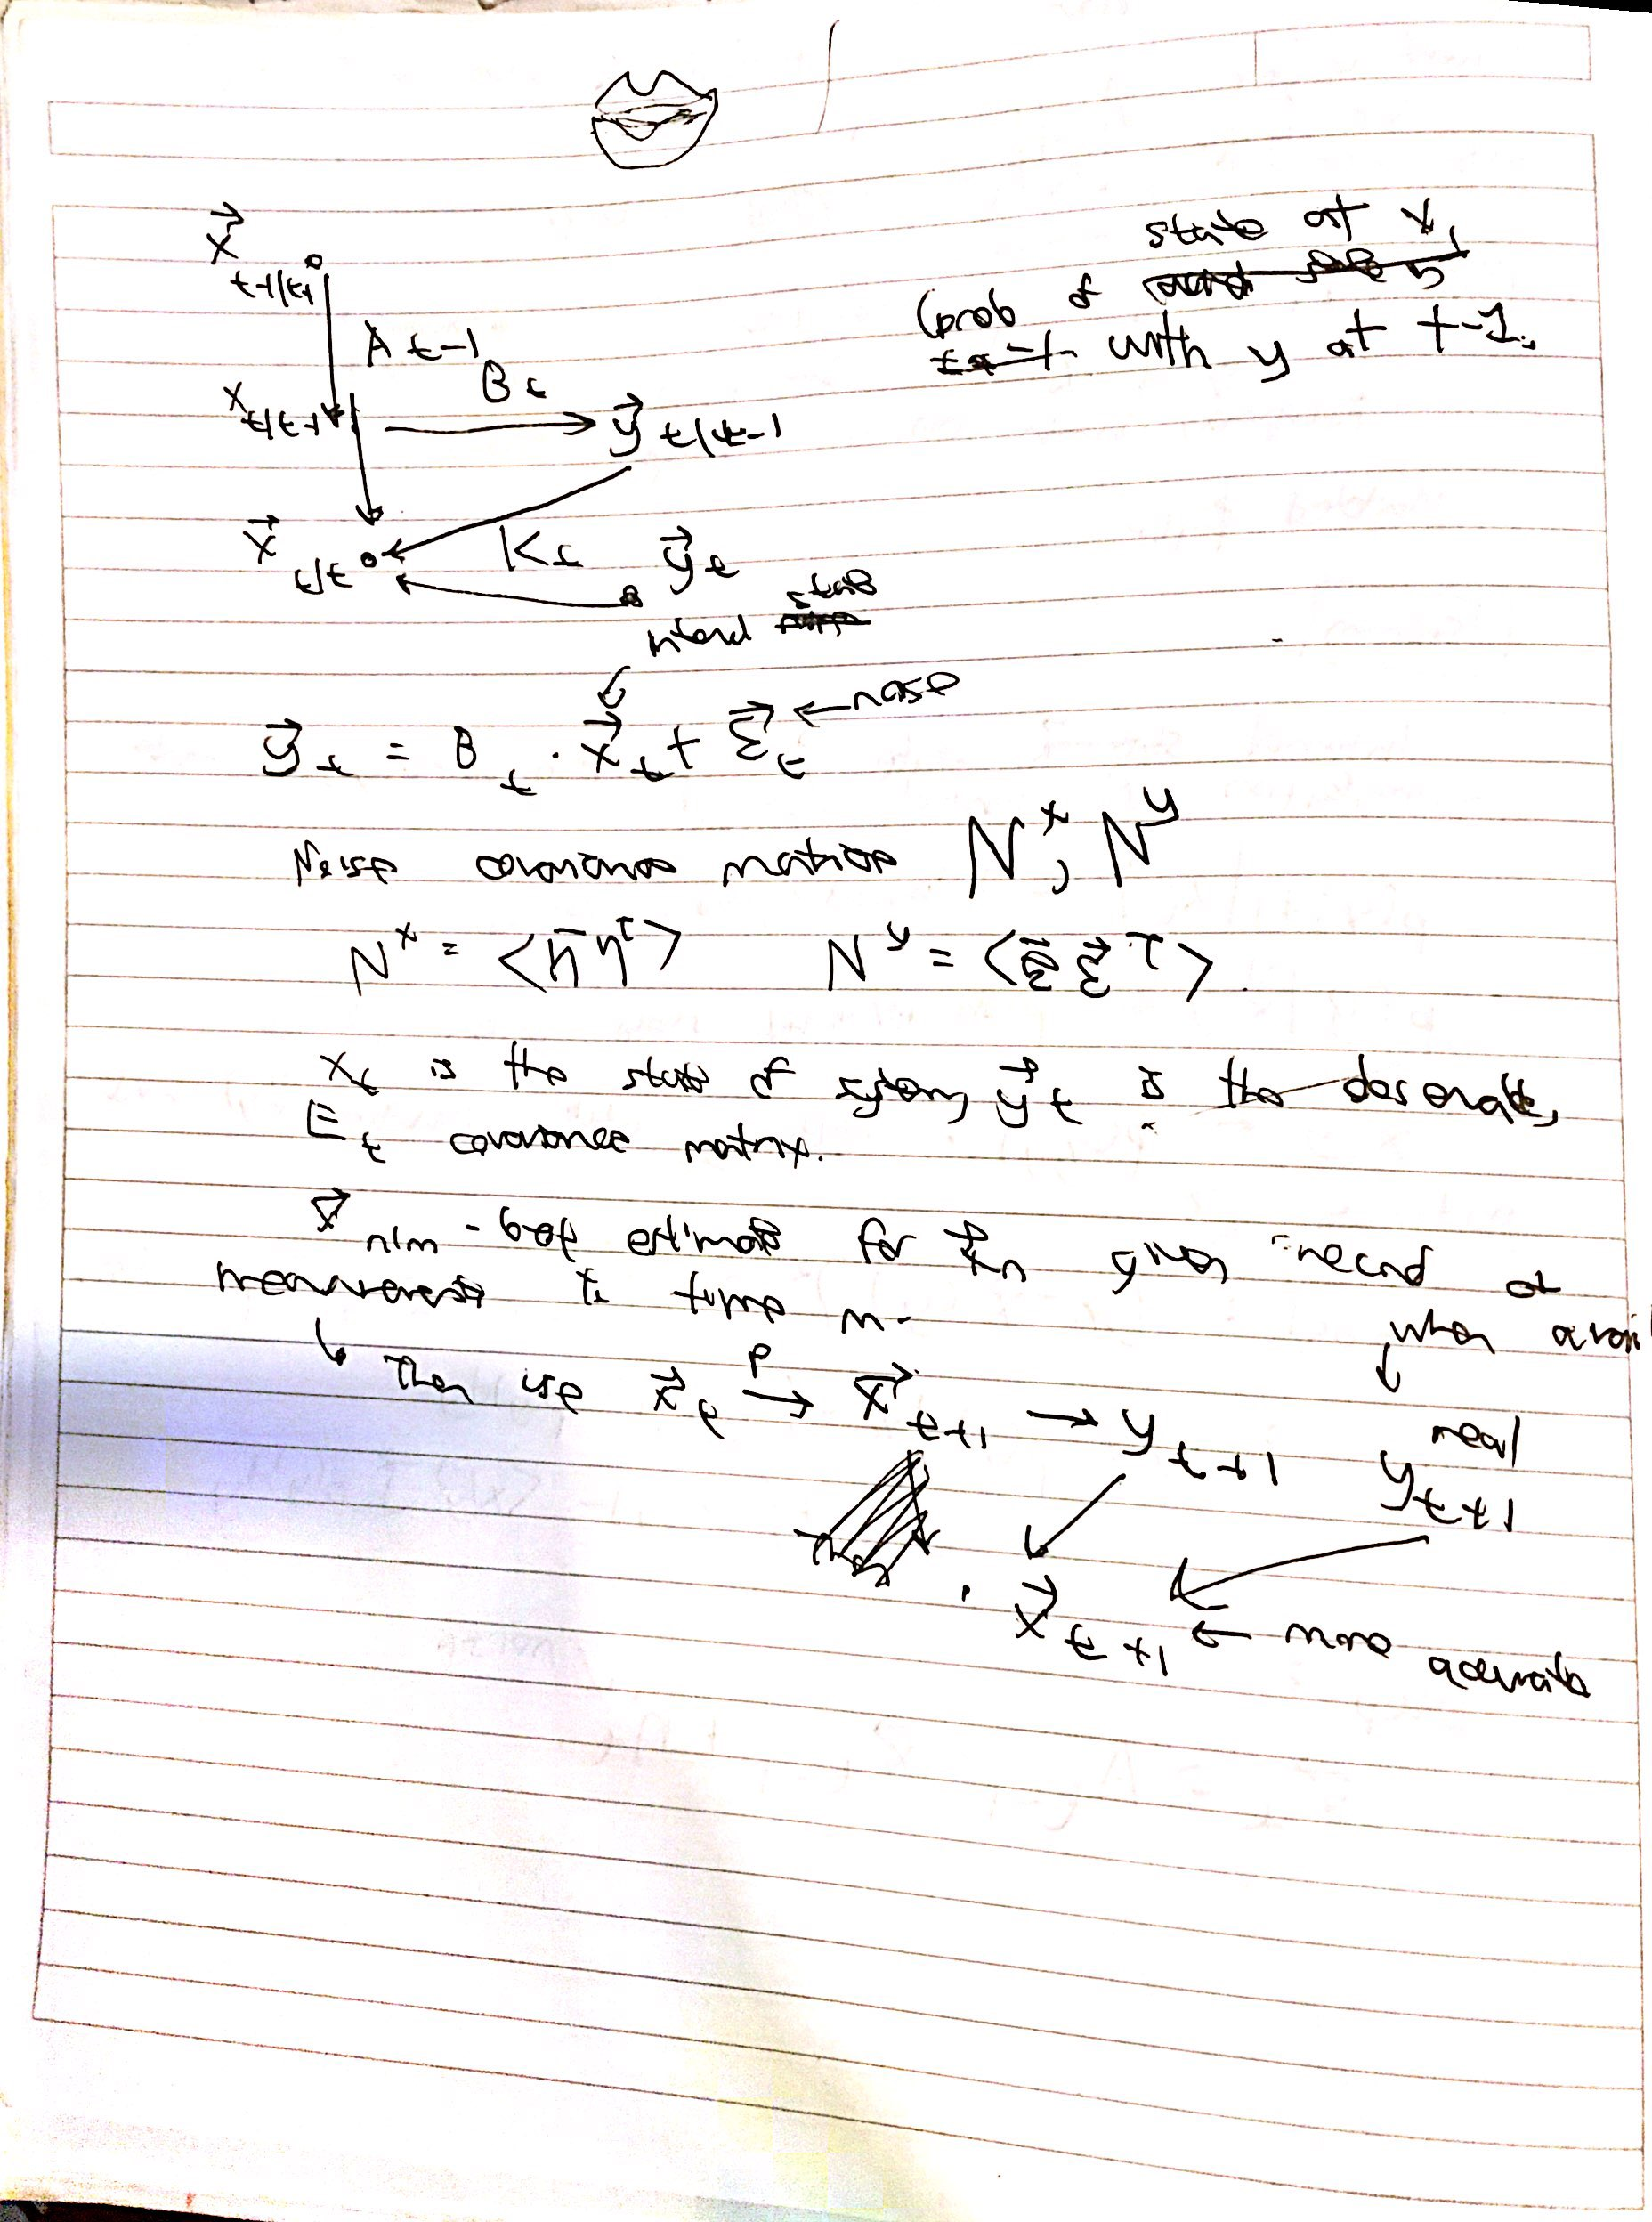

In [2]:
from IPython.display import Image
from IPython.display import FileLink, FileLink
Image(filename='files/week10notes.jpg')


19.1) What is the approximate Kalman gain matrix in the limit of small measurement noise? How is the error matrix updated in this case?

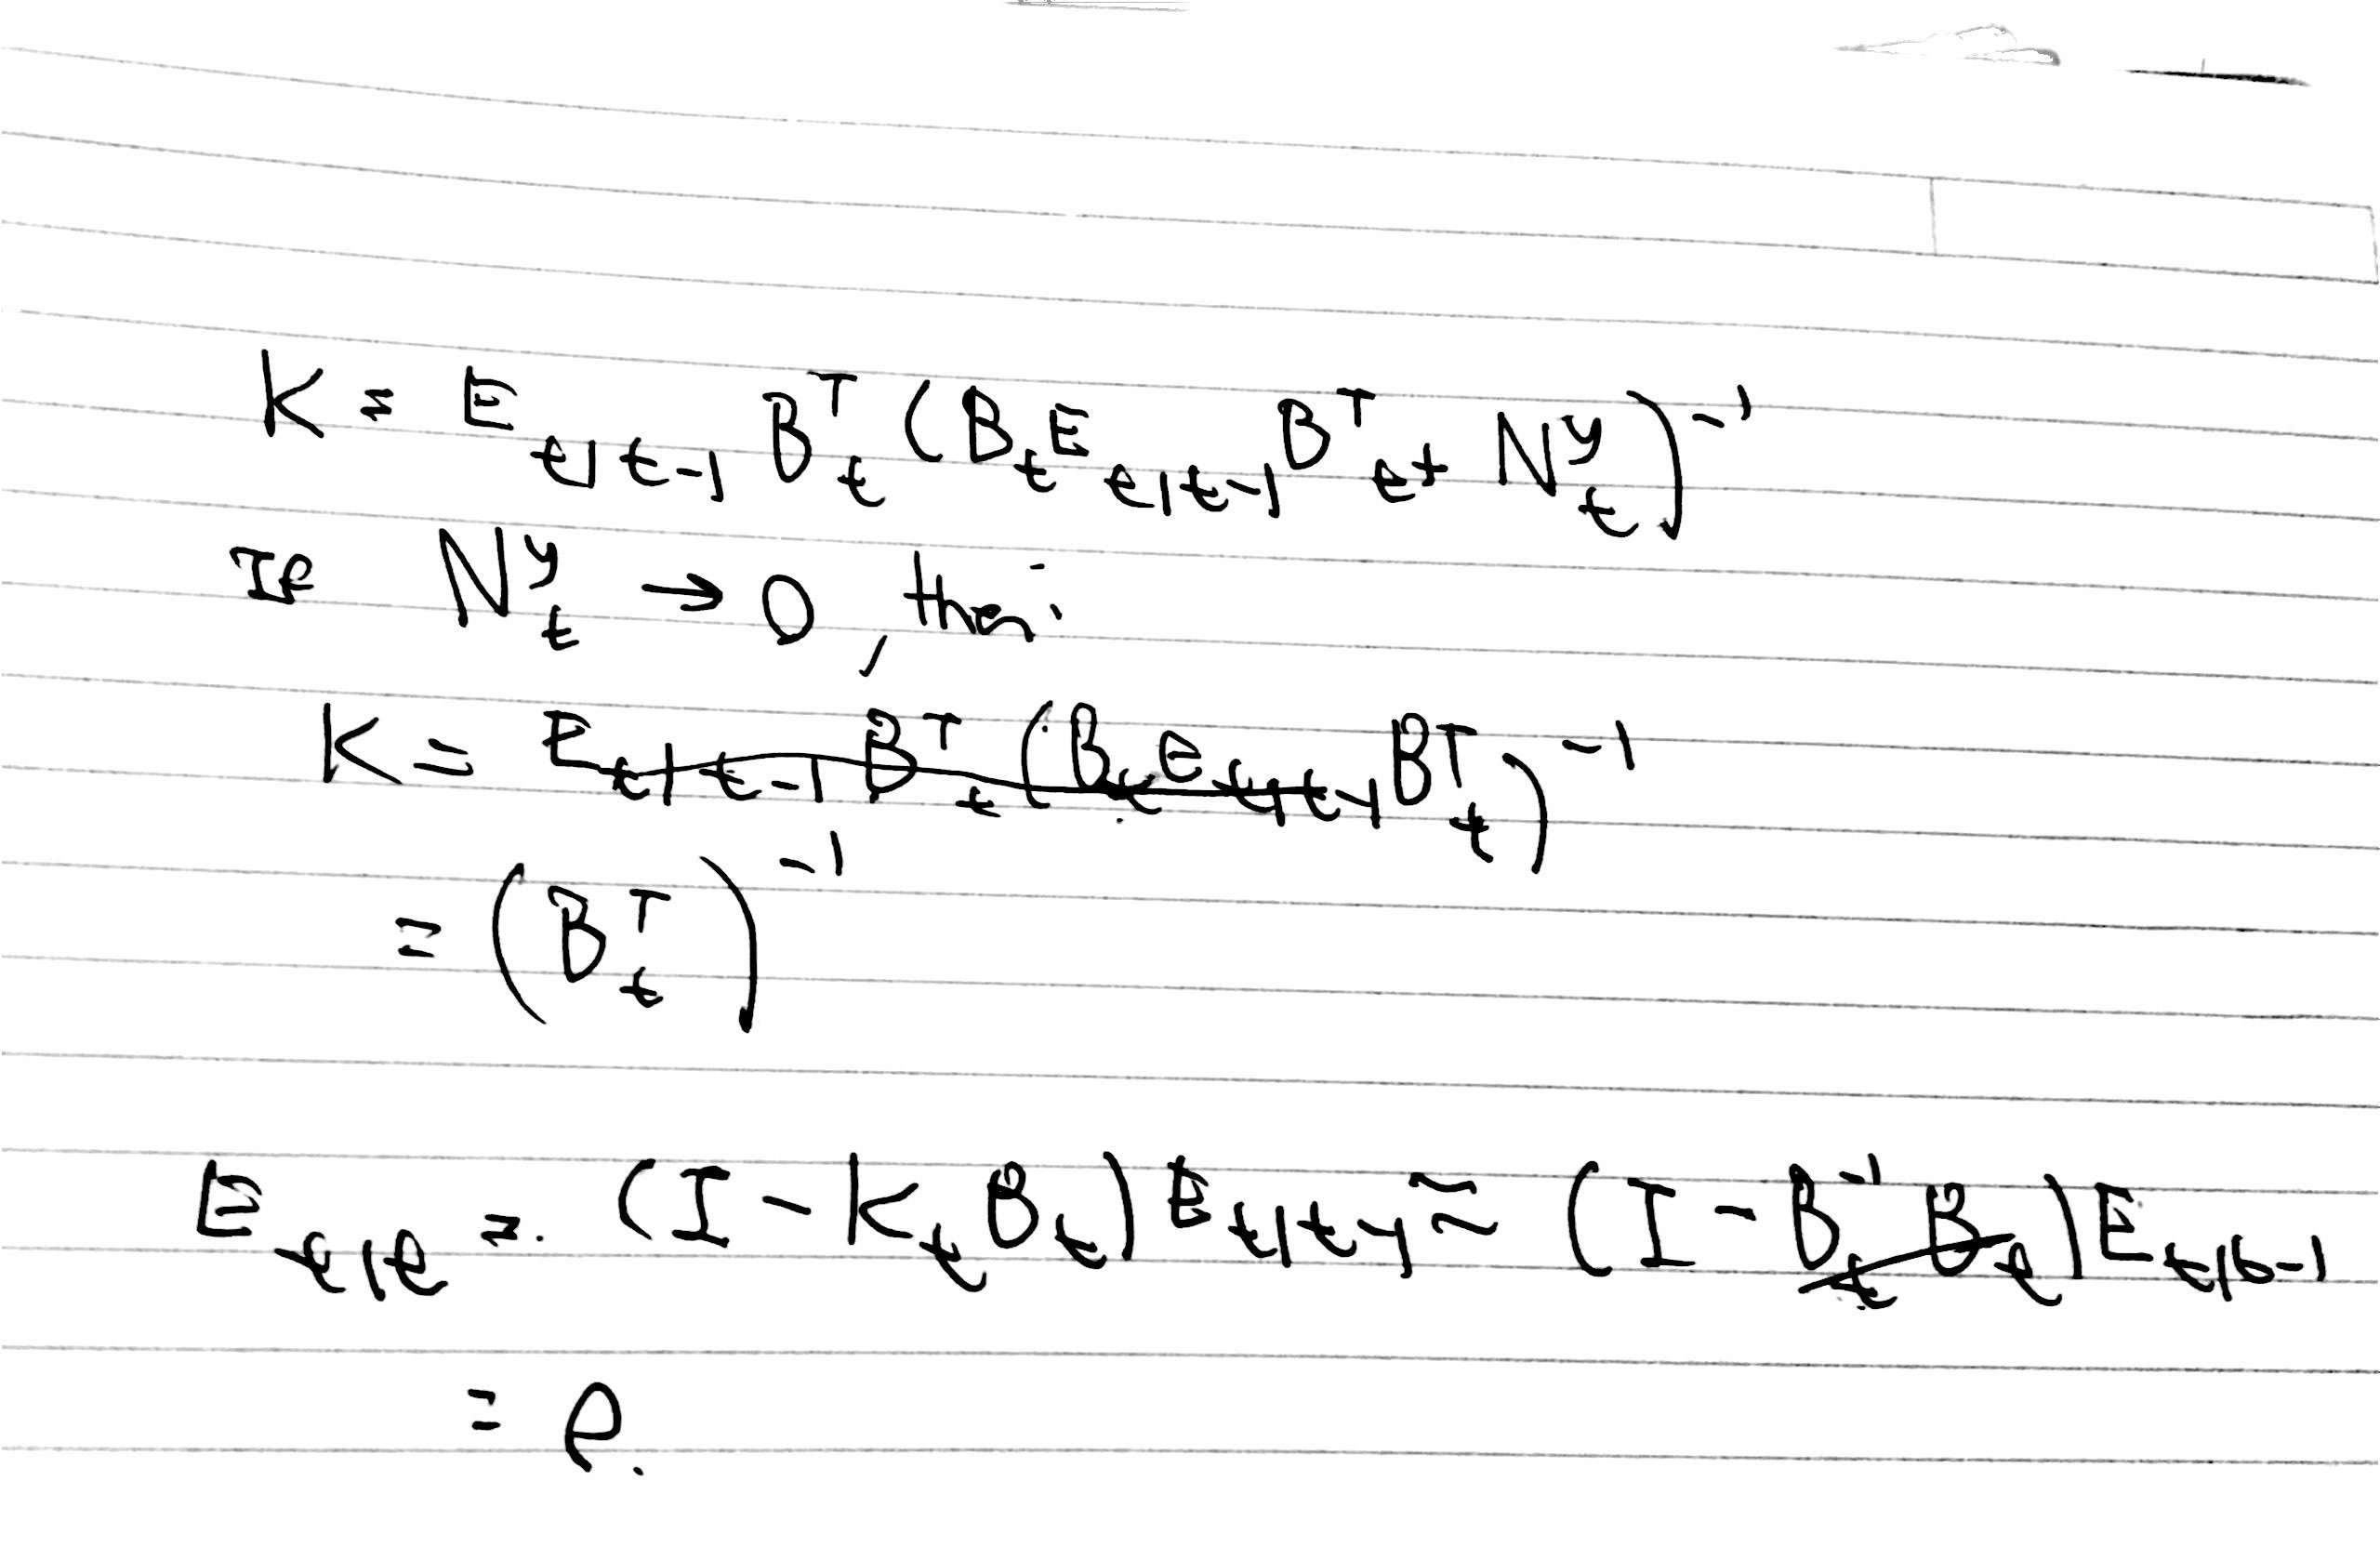

In [3]:

Image(filename='files/101a.jpg')

(19.2) Take as a test signal a periodically modulated sinusoid with noise added,
yn = sin[0.1tn + 4 sin(0.01tn)] + η ≡ sin(θn) + η , (19.69)
where η is a Gaussian noise process with σ = 0.1. Design an extended Kalman filter to estimate the noise-free signal. Use a two-component state vector ⃗xn = (θn,θn−1), and assume for the internal model a linear extrapolation θn+1 = θn + (θn−θn−1). Take the system noise matrix Nx to be diagonal, and plot the predicted value of y versus the measured value of y if the standard deviation of the system noise is chosen to be 10−1, 10−3, and 10−5. Use the identity matrix for the initial error estimate.

In [19]:
"""
Index:
x_pred = x_{t|t-1}
y_pred = y_{t|t-1}
E_pred = E_{t|t-1}
x_t = x_{t|t}
x_next = x_{t+1|t}
E_next = E_{t+1|t}
"""

def k_filter(A_func, B_func, f, g, init_state, init_obs, Y, init_E, N_x, N_y):
    x_est = init_state
    E_est = init_E
    Y_est = [init_obs]
    X_est = [x_est]
    
    for y in Y[1:]:
        x_est, y_est, E_est = update_step(A_func, B_func, f, g, x_est, y, E_est, N_x, N_y)
        Y_est.append(y_est)
        X_est.append(x_est)
        
    return X_est, Y_est
\
    
def update_step(A, B, update_x ,update_y, x_pred, y, E_pred, N_x, N_y):
    y_pred = update_y(x_pred)
    K =  np.matrix(np.matrix(E_pred) *(
            np.matrix(np.transpose(B(x_pred)))* np.linalg.inv(np.matrix((np.matrix(B(x_pred)) *
                                                                         np.matrix(E_pred)*np.matrix(np.transpose(B(x_pred)))) + N_y)))
                  )
    x = x_pred +(np.array(K) * np.transpose((y - y_pred)))
    x = [x[0][0], x[1][1]]
    ID = np.eye(2, 2)
    E = (ID-np.matrix(K)*np.matrix(B(x_pred)))*np.matrix(E_pred)
    x_next = update_x(x)
    E_next = (np.matrix(A(x)) * (np.matrix(E)*np.matrix(np.transpose(A(x))))) + N_x
    
    return x_next, y_pred, E_next



In [74]:

time = np.arange(0, 100, 0.01)

theta = 0.1*time + 4*np.sin(0.01*time)
eta = np.random.normal(loc=0, scale=0.1, size=time.size)
# vary the eta for noise
Y = np.sin(theta) + eta
def kalman_filter(std):
    def A(x):
        return np.array([[2, -1], [1, 0]])
    def B(x):
        return np.array([[np.cos(x[0]), 0], [0, np.cos(x[1])]])
    def get_x_est(x):
        return (2*x[0]-x[1], x[0])
    def get_y_est(x):
        return (np.sin(x[0]), np.sin(x[1]))
    N_x = np.array([[std**2, 0], [0,std**2]])
    N_y = np.array([[0.01, 0], [0, 0.01]])
    x_0 = np.array([0, 0])
    y_0 = (Y[0], Y[0])
    E_0 = np.eye(2, 2) # identityt
    
    return k_filter(A, B , get_x_est, get_y_est ,x_0 , y_0, Y,E_0, N_x, N_y)

def plot(Y, Y_est, title):
    fig = plt.figure(figsize=(15,18), facecolor="white")
    ax1 = fig.add_subplot(311)
    ax1.scatter(time,np.array(Y_est),color='green')
    ax1.plot(time,  Y, 'blue',alpha=0.7) # Black is the real Y
    plt.title(title)
    plt.show()



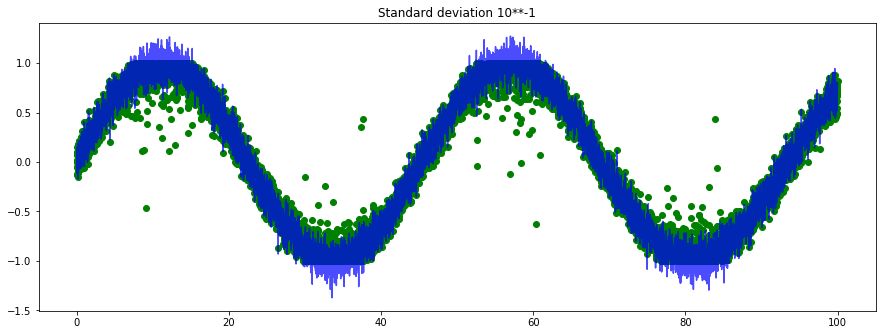

In [75]:
x_pred, Y_est = kalman_filter(10**-1)
Y_est = [y_est[0] for y_est in Y_est]
plot(Y, Y_est, "Standard deviation 10**-1")

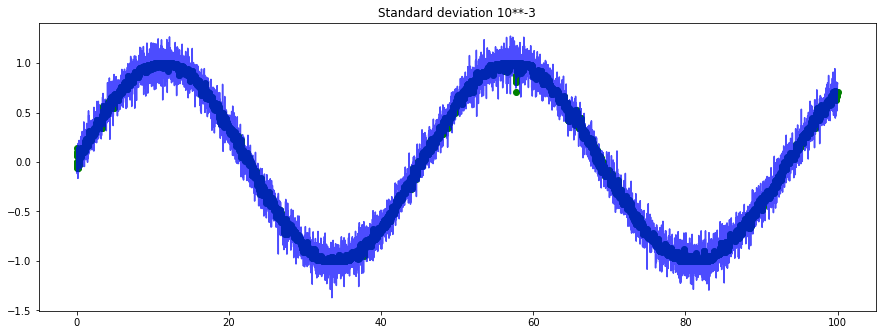

In [76]:
X_est, Y_est = kalman_filter(10**-3)
Y_est = [y_est[0] for y_est in Y_est]
plot(Y, Y_est, "Standard deviation 10**-3")

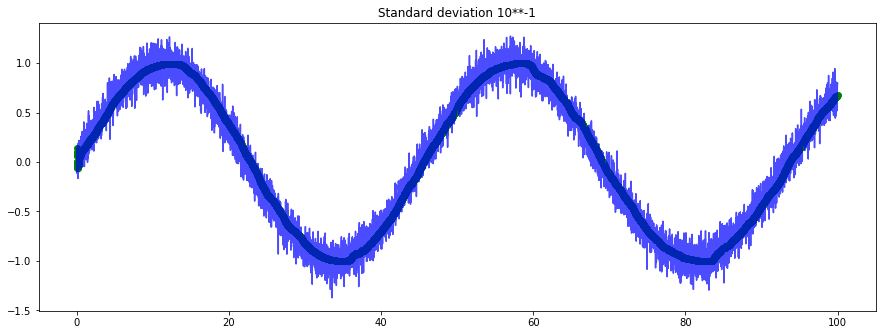

In [79]:
x_pred, Y_est = kalman_filter(10**-5)
Y_est= [y_est[0] for y_est in Y_est]
plot(Y, Y_est, "Standard deviation 10**-1")

Thus, the lower the standard deviation of the noise, the more precisecan be predicted of the internal state.

(19.3)(a) GivenanHMMtrellis(Figure19.5),   work out the probability to see an internal state given the observations p(xt|y1, . . . , yT ) in terms of forward and backward terms.


(b) Generate observations from the model in Figure 19.4, with a fair and a biased coin as the internal states, and probabilities to switch between them.


(c) Use knowledge of this model and those observations to estimate the probabil- ities for which coin was used when, and compare with the correct values.

## Important Takeaways

The job of a Kalman filter is to provide an estimate of the internal state given a history of measurements of an external observable. It presumes, however, that you already know how to calculate the transition probabilities, and further that you’re not interested in the probability distribution for the internal state. A Hidden Markov Model (HMM) addresses these limitations.